<b><font color='blue'>Dog Breed Classification using Stanford Dogs Dataset

[Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)

In [1]:
#!pip install scikit-learn opencv-python

<font color='blue'> Import Libr

In [4]:
import seaborn as sns
import numpy as np
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

<font color='blue'>

<font color='blue'>Retrieve and extract the dataset

In [5]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xvf images.tar

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n

<font color='blue'>

<font color='blue'>Data Preprocessing

Image Resizing:   64x64 pixels\
Flatten Images

In [7]:
def preprocess_images(image_dir, size=(64, 64)):
    images = []
    labels = []
    breed_labels = os.listdir(image_dir)  # breed names list
    for breed in breed_labels:
        breed_path = os.path.join(image_dir, breed)
        if os.path.isdir(breed_path):
            for img_name in os.listdir(breed_path):
                img_path = os.path.join(breed_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, size)
                img = img.flatten()
                images.append(img)
                labels.append(breed)
    return np.array(images), np.array(labels)

In [8]:
# Loading and preprocessing
X, y = preprocess_images("/content/Images")

<font color='blue'>Label Encoding: labels (breeds) to numerical labels

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

<font color='blue'> Split Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [13]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16464, 12288)
X_test shape: (4116, 12288)
y_train shape: (16464,)
y_test shape: (4116,)


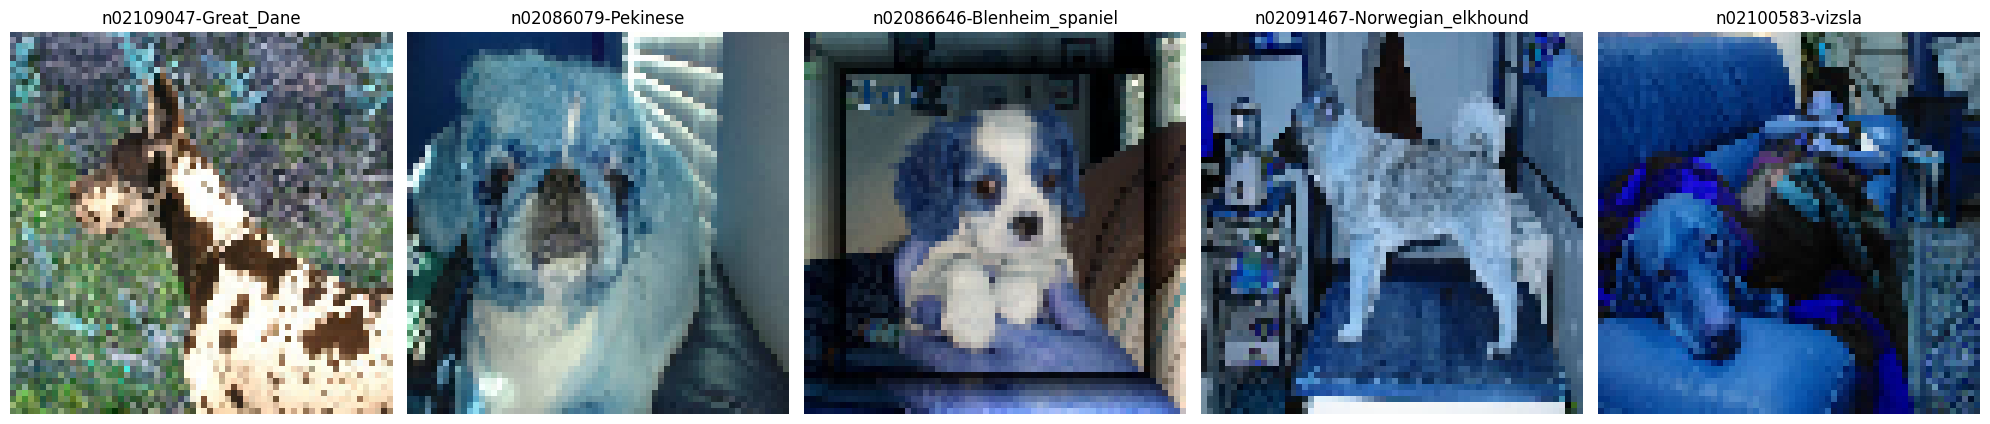

In [15]:
random_indices = random.sample(range(len(X_test)), 5)
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i, idx in enumerate(random_indices):
    image = X_test[idx].reshape(64, 64, 3)
    label = le.inverse_transform([y_test[idx]])[0]  # Decode label back to its breed name

    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Model Training\
Model 1: SVM

In [ ]:
svm= SVC(kernel='linear')
svm.fit(X_train, y_train)

Model 2: Random Forest Classifier


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Model Evaluation

In [ ]:
# SVM
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(classification_report(y_test, svm_predictions))

In [ ]:
# Random Forest
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, rf_predictions))

Performance Matrix/Conf Matrix

In [ ]:
# for SVM
plt.figure(figsize=(10,7))
plt.title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')

In [ ]:
# for Random Forest
plt.figure(figsize=(10,7))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3)
svm_grid.fit(X_train, y_train)
print("Best SVM parameters:", svm_grid.best_params_)

In [ ]:
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=3)
rf_grid.fit(X_train, y_train)
print("Best RF parameters:", rf_grid.best_params_)

Model Deployment : I am saving (not deploying on cloud)

In [ ]:
import joblib
joblib.dump(rf, 'rf_model.pkl')  # saved
joblib.dump(svm, 'svm_model.pkl')  #

In [ ]:
loaded_rf_model = joblib.load('rf_model.pkl')
loaded_svm_model = joblib.load('svm_model.pkl')